# Data Visualisering

Data_visual.ipynb er en interaktiv og visuell presentasjon av analysene fra data_analysis.ipynb. Hensikten er å formidle innsiktene på en informativ og engasjerende måte, rettet mot et bredere publikum.

Vi starter med fokus på nedbør, med en visualisering som viser fordelingen av ulike nedbørstyper (i prosent) for hvert år i perioden 2014–2024. Deretter følger en oversikt over tørkeperiodene i samme periode.

Deretter visualiseres vinddata gjennom percentiler, samt en årlig oversikt over høyeste, laveste og gjennomsnittlig vindhastighet.
Siste delen blir en heatmap som viser trender i temperatur og et histogram over årlig forekomster av "ekstremvær".

In [2]:
#Importerer funksjoner og klasser fra data_analysis.py og data_visual.py
import pandas as pd
import os
import sys 
import numpy as np
import matplotlib.pyplot as plt
import json

sys.path.insert(0, os.path.abspath(os.path.join(os.getcwd(), '../src')))

original_file = "blindern_data_cleaning.csv"
data_path = os.path.join(os.getcwd(),"..", "data")
original_path = os.path.join(data_path, original_file)  
df = pd.read_csv(original_path, delimiter=";")
df["Tid"] = pd.to_datetime(df["Tid"])

from modelling.data_analysis import DataAnalysis
from modelling.data_visual import DataVisual


bins_path = os.path.join(os.getcwd(), "..", "data", "bins.json")
with open(bins_path, "r", encoding="utf-8") as f:
    bin_defs = json.load(f)

da = DataAnalysis(df, 'Makstemp', ['Snø', 'Nedbør'], {"Middelvind": 20.8,"Nedbør": 20.0}, bin_defs)
dv = DataVisual(df, 'Makstemp', ['Snø', 'Nedbør'], {"Middelvind": 20.8,"Nedbør": 20.0}, bin_defs)


### Fordeling av nedbørstype (årlig)
Kakediagrammet viser fordelingen av nedbørstyper som forekomst i et år for alle år fra 2014 til 2024. Det er mulig å velge hvilket år man vil se på ved å velge på menyen på venstre hjørnet. Det er derfor også mulig å se på forskjeller i fordelingen fra år til år, samt økning/minskning av et eller flere nedbørstyper. Vi valgte å fremstille data ved kakediagram fordi det gir en oversiktlig fremstilling av forholdet mellom de forskjellige regntypene fra år til år. Det hadde tatt veldig mye plass med alle kakediagrammene, og derfor valgte vi en trekksmeny. 

In [ ]:
dv.rain_type()

interactive(children=(Dropdown(description='År:', options=(np.int32(2014), np.int32(2015), np.int32(2016), np.…

#### Resultat:
 Generelt var endringen fra år til år maksimalt/minimalt som henholdvis +/-5%, som betyr lite endring fra år til år. Vi kan se at i 2022, var et av de årene med størst andel oppholdsvær.

### Tørkeperioder
Grafen gir oversikt over alle tørkeperiodene (dager uten nedbør) som varte over 12 kontinuerlig dager. Vi valgte 12 dager for å sette fokus på lengre og mer alvorlig tørkeperioder. Merk at det går ann å endre på minste antall dager for tørkeperiode, slik at en kan få med seg flere kortere tørkeperioder. Denne type valg av visualisering gir et oversiktlig bilde over når tørkeperiodene var og hvor lenge hver periode varte. Altså er det lett å kunne se hvilket år som hadde flere/færre tørkeperioder enn andre.

In [13]:
dry_periods_df=da.drydays(10,"df")

dv.plot_dry_periods(dry_periods_df)

#### Resultat:
Vi kan se at den lengste tørkeperioden var i 2023 med hele 21 dager. Vi ser at det er ingen år med særlig flere tørkeperioder i forhold til andre.

###Sammenhengende dager med snø


In [4]:
# Generate our snow days DataFrame
snow_periods_df=da.snowdays(5,"df") # Get dry periods with a minimum of 5 days

dv.plot_snow_periods(snow_periods_df)

# Vind
### Vind gjennom percentiler
Denne koden visualiserer fordelingen av middelvind i form av en percentilkurve. Ved å sortere vindhastighetene og plassere dem langs en skala fra 0 til 100 prosent, får vi et tydelig bilde av hvordan vindverdiene fordeler seg. Grafen gjør det enkelt å identifisere hvor store deler av datagrunnlaget som ligger under bestemte vindnivåer – for eksempel kan man se hvilken vindstyrke som representerer 90. percentil. Siden percentilkurven for hvert år var omtrent like, bestemte vi å lage en percentilkurve for hele vindkolonnen for å gi en god oversikt på gjennomsnitten

In [9]:
dv.wind_precentiles()

#### Resultat:
Det vi ser her er at rundt 98% av middelvinden for Blindern er under 6 m/s. Høyest percentile ligger på 8 m/s, som viser at det er ingen ekstreme vindverdier. 

### Linechart 
Denne grafen viser maksimal, minimal og gjennomsnittlig vindstyrke i perioden. Den gir et raskt overblikk over variasjonen i vindforhold fra år til år, og kan brukes til å identifisere år med spesielt kraftig eller svak vind. Vi valgte søylediagram for å holde det ryddig, i motsetning til eksempel linjediagram med muligens overlappende linjer. Vi valgte variablene maksimal-, minimal- og gjennomsnittlig vind fordi det kan brukes til videre analyse av værforholdene og endringer som hadde forekommet. 

In [6]:
dv.linechart_wind()

#### Resultat:
Det viser seg at vind er relativ lik gjennom årene, altså ingen klare trender som stigning eller minking. 


### Heatmap
 Visualiseringen viser gjennomsnittlig maksimumstemperatur for hver måned og hvert år. Den gir et visuelt overblikk over temperaturtrender og sesongvariasjoner gjennom perioden 2014–2024. Lyse farger indikerer høyere temperaturer, mens mørkere farger viser lavere verdier – nyttig for å identifisere varme somre eller milde vintre. Vi valgte denne type visualiseringen for å lett identifisere sessongmønstre med farge, og vise gjennomsnitt temperatur for hver måned. Videre kan denne heatmap brukes til å avsløre avvik, dersom det er en kaldere mai eller varmere juli. 

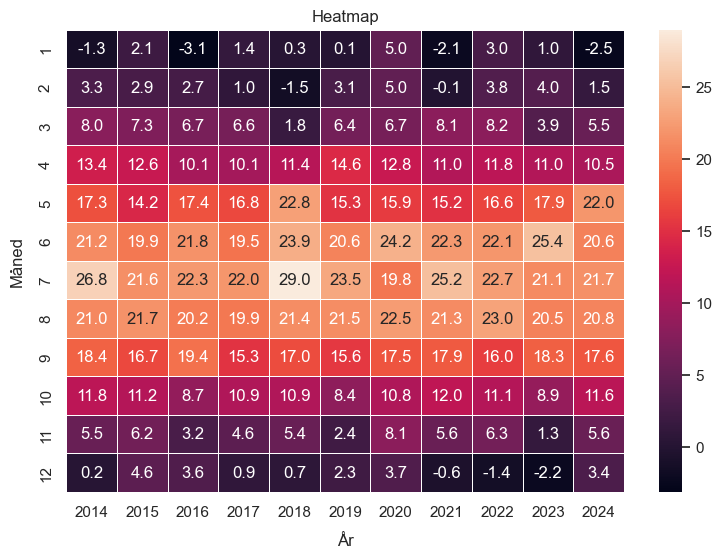

In [7]:
dv.heatmap()

#### Resultat:
Her ser vi en sessongforskjell på fargene, der det er lysere i midten på grunn av sommertemperatur, og mørkere øverst og nederst fordi de er vintermånedene. Videre kan vi se klart at juli 2018 har den høyeste temperatur, 29.0, og januar 2016 har den laveste, -3.1. Hvis vi ser på de loddrette cellene kan vi feks. se at 2020 var generelt varmere enn andre år. 

### Ekstremvær
Denne grafen viser årlige forekomster av ekstremvær, fordelt på ulike værtyper som høy temperatur, lave temperaturer, nedbør, snø og sterke vindkast. Dette kan være nyttig for å identifisere klimatisk utvikling eller perioder med unormalt vær. Vi valgte stablet stolpediagram for å vise fordelingen av hvilken type ekstremvær det er, og generelt trender; om det er en stigning/nedgang i ekstremvær over årene.

In [8]:
extreme_weather = da.years_severity().reset_index().rename(columns={'index': 'Tid'})
dv.extreme_weather_cases(extreme_weather)

#### Resultat:
Her kan vi se at 2018 var et spesielt år med flere tilfeller av ekstremvær, som kan påvirke beregninger av gjennomsnitt og predikasjoner videre i oppgaven ved å lage støy i modellene. Det kan også hende at 2018 er en del av en større trend i det lange løp satt i kontekst med klimakrisen. Siden vi bare har 10 år, og ikke 50 år med data, vil det ikke være mulig å se denne potensielle trenden i vårt datasett. Vi kan se at i 2022, var et av de årene med størst andel oppholdsvær.

Vi ser også at høye vindkast er den mest vanlige type ekstremvær i Oslo, mens tilfeller med lav temperatur er den mest uvanlig. Våre data for høye vindkast har blitt standarisert, som kan påvirke denne grafen. Se mer om dette under data_analysis.ipynb. 